In [6]:
%pip install dlib==19.24.2 opencv-python-headless imutils

  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached imutils-0.5.4-py3-none-any.whl
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [113 lines of output]
      <string>:190: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
              ********************************************************************************
      
      !!
      C:\Users\GamerPc\AppData\Local\Temp\pip-build-env-4ps2hz9p\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running b

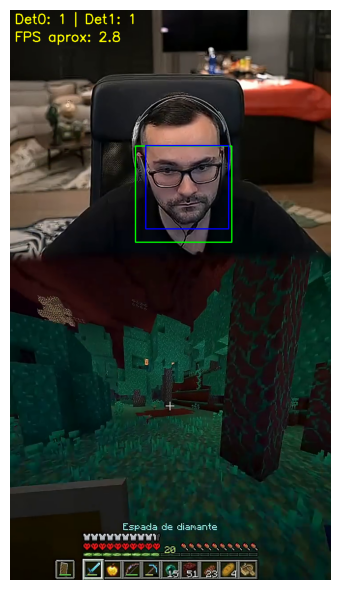

FPS promedio en 200 frames: 2.76


In [15]:
import cv2, dlib, time
import matplotlib.pyplot as plt
from IPython.display import clear_output

detector = dlib.get_frontal_face_detector()
cap = cv2.VideoCapture('prueba.mp4')

frames = 0
start = time.time()

while True:
    ok, frame = cap.read()
    if not ok: break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # --- detección sin upsampling ---
    rects0 = detector(gray, 0)
    for r in rects0:
        x,y,w,h = r.left(), r.top(), r.width(), r.height()
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2) # Rectangulo verde

    # --- detección con upsampling ---
    rects1 = detector(gray, 1)
    for r in rects1:
        x,y,w,h = r.left(), r.top(), r.width(), r.height()
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2) # Rectangulo azul

    frames += 1

    # Mostrar cada 50 frames para no inundar la salida
    if frames % 50 == 0:
        fps0 = cap.get(cv2.CAP_PROP_FPS)  # referencia del video
        fps_real = frames / (time.time() - start)
        cv2.putText(frame, f"Det0: {len(rects0)} | Det1: {len(rects1)}",
                    (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,255),2)
        cv2.putText(frame, f"FPS aprox: {fps_real:.1f}", (10,70),
                    cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,255),2)
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # detener tras 200 frames para calcular promedio
    if frames >= 200:
        break

cap.release()
end = time.time()
fps_promedio = frames / (end - start)
print(f"FPS promedio en {frames} frames: {fps_promedio:.2f}")